In [1]:
import umap.aligned_umap
import numpy as np
import matplotlib.pyplot as plt
import torch

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-03 14:53:19.855696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-03 14:53:20.479795: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-10-03 14:53:20.479848: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinf

In [2]:
training_data_loc = "/home/yifan/Exp/Dropout/0.3/experiment1/Training_data/training_dataset_label.pth"
training_labels = torch.load(training_data_loc, map_location="cpu")
training_labels = training_labels.numpy()

In [3]:
reference_path = '/home/yifan/dataset/clean/pairflip/cifar10/0/Model/Epoch_200/train_data.npy'
target_path = '/home/yifan/Exp/Dropout/0.3/experiment1/Model/Epoch_200/train_data.npy'
ref_train_data = np.load(reference_path)
target_train_data = np.load(target_path)

In [4]:
target_train_data = target_train_data.reshape(target_train_data.shape[0],target_train_data.shape[1])

In [5]:
def showalignedRes(slices, subset_length,row,column,figsize,labels):
    # create relation dict
    relation_dict = {i: i for i in range(subset_length)}
  
    relation_dicts = [relation_dict.copy() for _ in range(len(slices) - 1)]
    # 使用 AlignedUMAP
    aligned_mapper = umap.AlignedUMAP().fit(slices,relations=relation_dicts)
    # visualization result
    fig, axs = plt.subplots(row, column, figsize=figsize)
    for i, ax in enumerate(axs.flatten()):
        ax.scatter(*aligned_mapper.embeddings_[i].T, s=2, c=labels, cmap="Spectral")
        ax.set(xticks=[], yticks=[])
    return aligned_mapper.embeddings_
    plt.tight_layout()

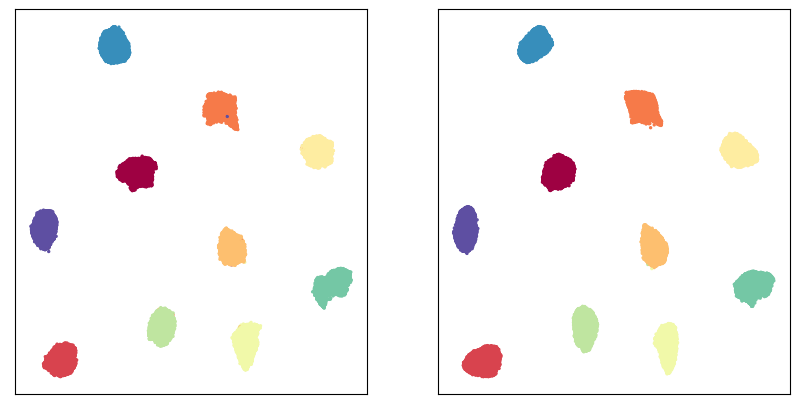

In [6]:
# put data together
subset_length = 50000
slices = [ref_train_data[:subset_length], target_train_data[:subset_length]]
labels = training_labels[:subset_length]

embeddings = showalignedRes(slices, subset_length, 1,2,(10,5),labels)

In [7]:
import sys 
sys.path.append('/home/yifan/projects/cophi/ContraVis')
from eval.evaluate import *

In [9]:
ref_emb = embeddings[0]
tar_emb = embeddings[1]
ref_nn_p = evaluate_proj_nn_perseverance_knn(ref_train_data[:subset_length], ref_emb, 15)
tar_nn_p = evaluate_proj_nn_perseverance_knn(target_train_data[:subset_length], tar_emb, 15)
print("#aligned-umap# nn preserving: {:.2f}/{:d} in reference for {} points".format(ref_nn_p, 15, subset_length))
print("#aligned-umap# nn preserving: {:.2f}/{:d} in target for {} points".format(tar_nn_p, 15, subset_length))

Tue Oct  3 14:58:57 2023 Building RP forest with 16 trees
Tue Oct  3 14:58:58 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Tue Oct  3 14:58:59 2023 Building RP forest with 16 trees
Tue Oct  3 14:59:00 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Tue Oct  3 14:59:02 2023 Building RP forest with 16 trees
Tue Oct  3 14:59:02 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Tue Oct  3 14:59:04 2023 Building RP forest with 16 trees
Tue Oct  3 14:59:04 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
#aligned-umap# nn preserving: 1.77/15 in reference for 50000 points
#aligned-umap# nn preserving: 1.84/15 in target for 50000 points


In [10]:
ref_nn_perseverance_trustworthiness = evaluate_proj_nn_perseverance_trustworthiness(ref_train_data[:subset_length], ref_emb,15)
tar_nn_perseverance_trustworthiness = evaluate_proj_nn_perseverance_trustworthiness(target_train_data[:subset_length], tar_emb,15)

#aligned-umap# nn preserving: 0.97 in reference for 50000 points
#aligned-umap# nn preserving: 0.98 in target for 50000 points


In [12]:
print("#aligned-umap# trustworthiness: {:.4f} in reference for {} points".format(ref_nn_perseverance_trustworthiness, subset_length))
print("#aligned-umap# trustworthiness: {:.4f} in target for {} points".format(tar_nn_perseverance_trustworthiness, subset_length))

#aligned-umap# trustworthiness: 0.9714 in reference for 50000 points
#aligned-umap# trustworthiness: 0.9768 in target for 50000 points


In [11]:
import os 
path = "/home/yifan/dataset/clean/pairflip/cifar10/0"
reference_path_epoch1 = os.path.join(path,"Model","Epoch_{}".format(1),"train_data.npy" )
epoch1 = np.load(reference_path_epoch1)
reference_path_epoch50 = os.path.join(path,"Model","Epoch_{}".format(50),"train_data.npy" )
epoch50 = np.load(reference_path_epoch50)
reference_path_epoch100 = os.path.join(path,"Model","Epoch_{}".format(100),"train_data.npy" )
epoch100 = np.load(reference_path_epoch100)
reference_path_epoch150 = os.path.join(path,"Model","Epoch_{}".format(150),"train_data.npy" )
epoch150 = np.load(reference_path_epoch150)


In [12]:
epoch1 = epoch1.reshape(epoch1.shape[0],epoch1.shape[1])
epoch50 = epoch50.reshape(epoch1.shape[0],epoch1.shape[1])
epoch100 = epoch100.reshape(epoch1.shape[0],epoch1.shape[1])
epoch150 = epoch150.reshape(epoch1.shape[0],epoch1.shape[1])

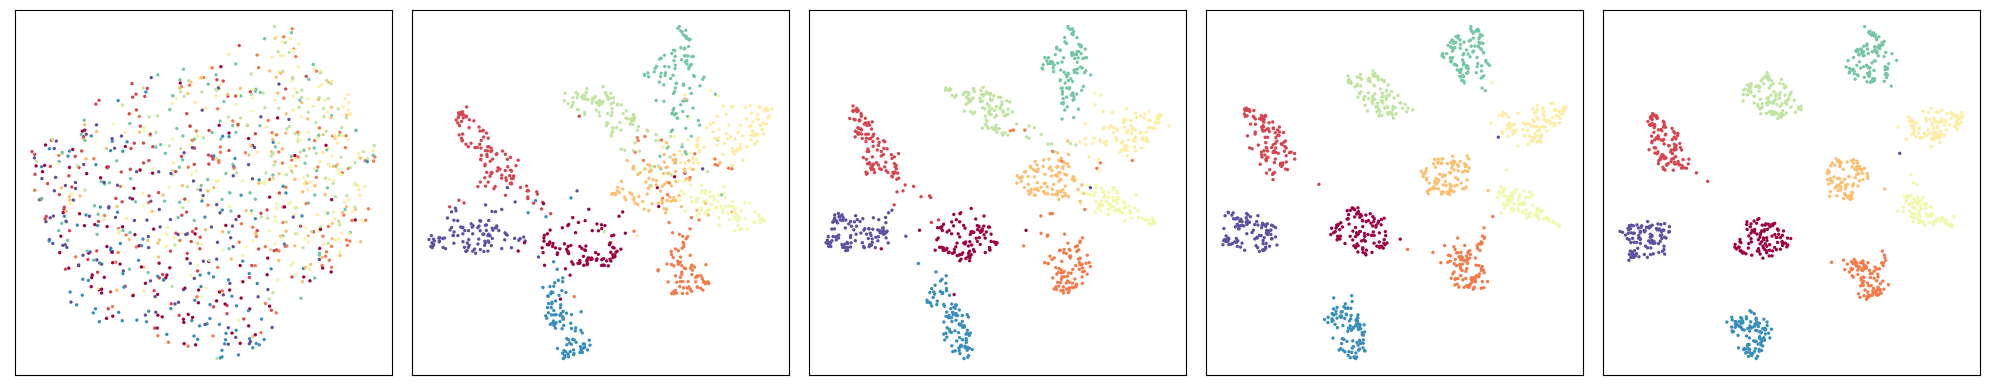

In [27]:
# Use aligned umap to visualize the training process epoch1 to epoch 200
# put data together
subset_length = 1000
slices = [epoch1[:subset_length], epoch50[:subset_length],epoch100[:subset_length],epoch150[:subset_length],ref_train_data[:subset_length] ]
labels = training_labels[:subset_length]

showalignedRes(slices, subset_length, 1,5,(20, 4),labels)

In [28]:
import os 
path = "/home/yifan/Exp/Dropout/0.3/experiment1/"
path_epoch1 = os.path.join(path,"Model","Epoch_{}".format(1),"train_data.npy" )
tar_epoch1 = np.load(path_epoch1)
path_epoch50 = os.path.join(path,"Model","Epoch_{}".format(50),"train_data.npy" )
tar_epoch50 = np.load(path_epoch50)
path_epoch100 = os.path.join(path,"Model","Epoch_{}".format(100),"train_data.npy" )
tar_epoch100 = np.load(path_epoch100)
path_epoch150 = os.path.join(path,"Model","Epoch_{}".format(150),"train_data.npy" )
tar_epoch150 = np.load(path_epoch150)
path_epoch200 = os.path.join(path,"Model","Epoch_{}".format(200),"train_data.npy" )
tar_epoch200 = np.load(path_epoch200)
tar_epoch1 = tar_epoch1.reshape(epoch1.shape[0],epoch1.shape[1])
tar_epoch50 = tar_epoch50.reshape(epoch1.shape[0],epoch1.shape[1])
tar_epoch100 = tar_epoch100.reshape(epoch1.shape[0],epoch1.shape[1])
tar_epoch150 = tar_epoch150.reshape(epoch1.shape[0],epoch1.shape[1])
tar_epoch200 = tar_epoch200.reshape(epoch1.shape[0],epoch1.shape[1])

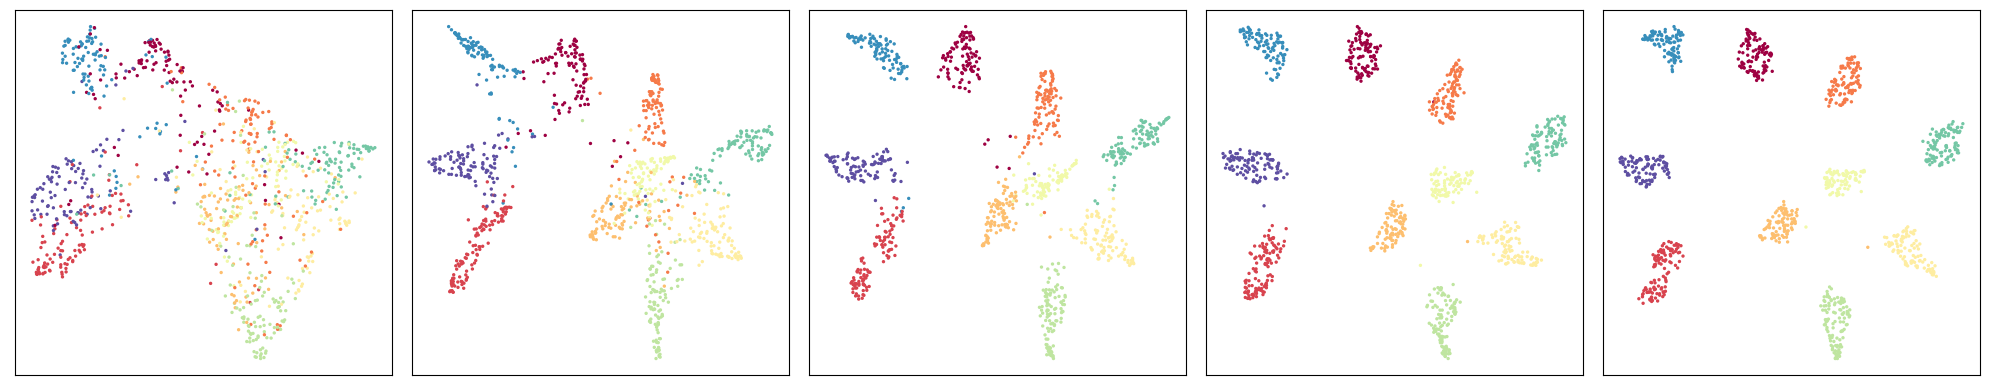

In [29]:
# Use aligned umap to visualize the training process epoch1 to epoch 200
# put data together
subset_length = 1000
slices = [tar_epoch1[:subset_length], tar_epoch50[:subset_length],tar_epoch100[:subset_length],tar_epoch150[:subset_length],tar_epoch200[:subset_length] ]
labels = training_labels[:subset_length]

showalignedRes(slices, subset_length, 1,5,(20, 4),labels)

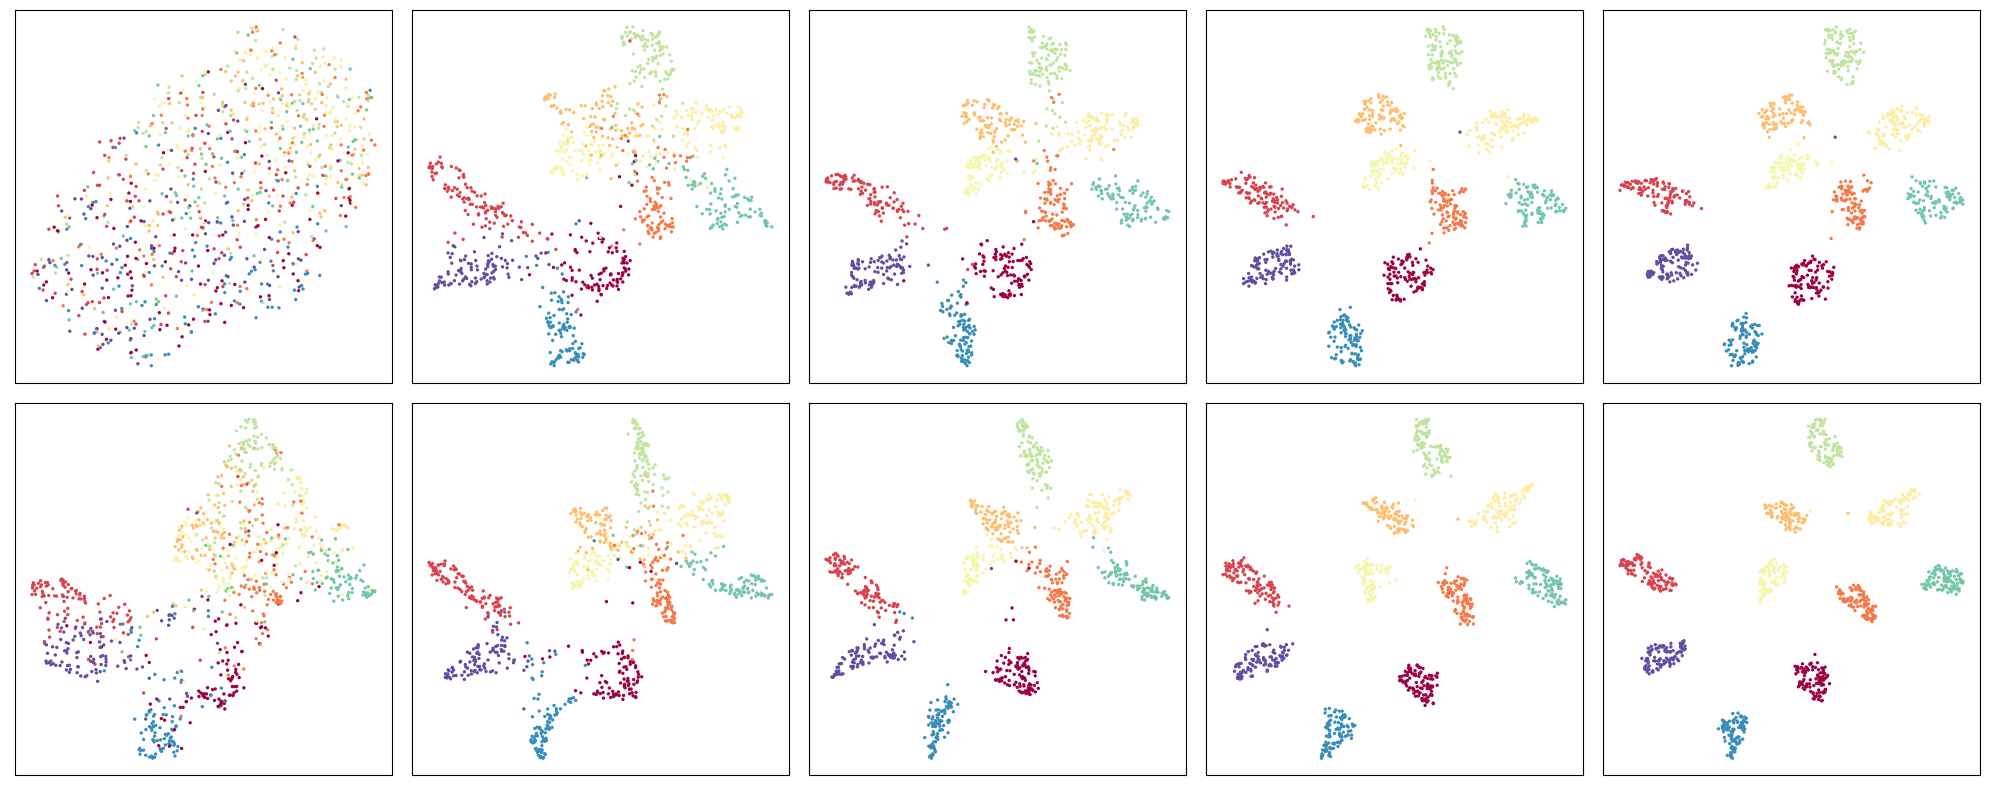

In [36]:
# Use aligned umap to visualize the training process epoch1 to epoch 200
# put data together
subset_length = 1000
slices = [epoch1[:subset_length], epoch50[:subset_length],epoch100[:subset_length],epoch150[:subset_length],ref_train_data[:subset_length], tar_epoch1[:subset_length], tar_epoch50[:subset_length],tar_epoch100[:subset_length],tar_epoch150[:subset_length],tar_epoch200[:subset_length] ]
labels = training_labels[:subset_length]

showalignedRes(slices, subset_length, 2,5,(20, 8),labels)

In [35]:
##### evalutaion
# len(aligned_mapper.embeddings_[0])

1000